#  Import Libraries 

In [1]:
import os 
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import VGG16, EfficientNetB6

In [2]:
data = '/kaggle/input/brain-tumor-mri-dataset/Training'

In [3]:
target_size = (224,224)

# Preprocessing and Loading Data

In [4]:
images = []
labels = []
class_names = os.listdir(data)
for class_name in class_names:
    class_folder = os.path.join(data,class_name)
    if not os.path.join(class_folder):
        continue
    #iterate through each image in the class folder 
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        
        # load img
        img = cv2.imread(img_path)
        if img is None:
            continue
            
        #Resize the image to target size
        img = cv2.resize(img, target_size)
        img = img_to_array(img)/255.0
        
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)

In [5]:
images 

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [6]:
labels

array(['pituitary', 'pituitary', 'pituitary', ..., 'glioma', 'glioma',
       'glioma'], dtype='<U10')

In [7]:
print(len(images))
print(len(labels))

5712
5712


In [8]:
print(type(images))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
labels = pd.Series(labels)

In [10]:
unique_labels = labels.unique()

In [11]:
unique_labels

array(['pituitary', 'notumor', 'meningioma', 'glioma'], dtype=object)

In [12]:
labels

0       pituitary
1       pituitary
2       pituitary
3       pituitary
4       pituitary
          ...    
5707       glioma
5708       glioma
5709       glioma
5710       glioma
5711       glioma
Length: 5712, dtype: object

In [13]:
labels.shape

(5712,)

In [14]:
images.shape

(5712, 224, 224, 3)

In [15]:
labels.head()

0    pituitary
1    pituitary
2    pituitary
3    pituitary
4    pituitary
dtype: object

In [16]:
labels.tail()

5707    glioma
5708    glioma
5709    glioma
5710    glioma
5711    glioma
dtype: object

In [17]:
type(data)


str

---

# Label Encoding

In [18]:
labels_dic = {'glioma':0,'meningioma':1,'notumor':2,'pituitary':3}


In [19]:
numeric_labels = [labels_dic[label] for label in labels]

In [20]:
numeric_labels

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [21]:
numeric_labels = np.array(numeric_labels)

In [22]:
print(numeric_labels)

[3 3 3 ... 0 0 0]


In [23]:
print(numeric_labels[0:10])
print(numeric_labels[3000])

[3 3 3 3 3 3 3 3 3 3]
2


In [24]:
print(type(numeric_labels))

<class 'numpy.ndarray'>


---

## Visualization 

#### glioma visualization 

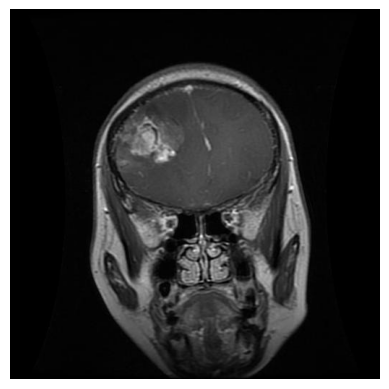

In [25]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### meningioma 

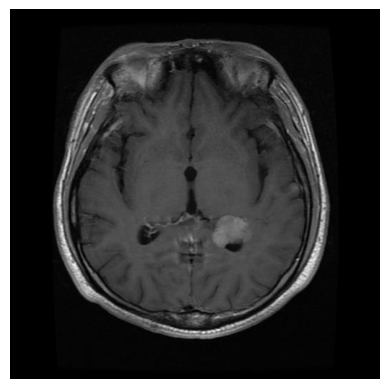

In [26]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-meTr_0002.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### notumor

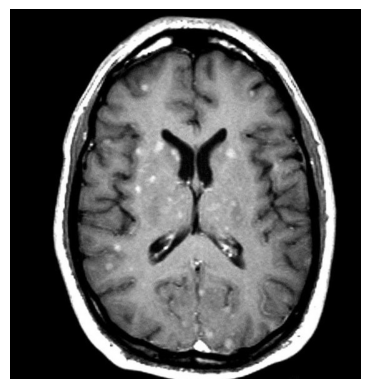

In [27]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-noTr_0003.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### pituitary

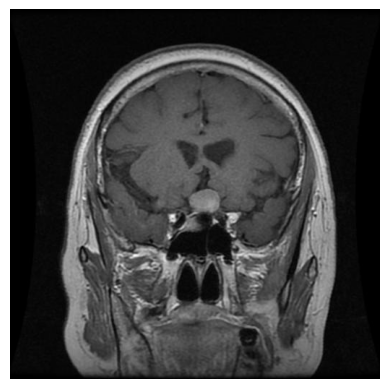

In [28]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-piTr_0005.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

---

In [29]:
type(numeric_labels)

numpy.ndarray

In [30]:
type(images)

numpy.ndarray

In [31]:
x = images
y = numeric_labels

In [32]:
x

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [33]:
y

array([3, 3, 3, ..., 0, 0, 0])

In [34]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Spliting Train and Test Data

In [35]:
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(5712, 224, 224, 3) (4569, 224, 224, 3) (1143, 224, 224, 3)


In [37]:
print(y.shape,y_train.shape,y_test.shape)

(5712,) (4569,) (1143,)


# Scaling the Data

In [38]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [39]:
x_train[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [40]:
x_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

---

# ANN  

In [41]:
num_of_class = 4

In [42]:
model = Sequential([
    layers.Flatten(input_shape=(224,224,3)),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_of_class,activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
             )

In [44]:
model.fit(x_train_scaled,y_train, validation_split=0.1,epochs=10)

Epoch 1/10


I0000 00:00:1725793315.904521      89 service.cc:145] XLA service 0x7d91f8009010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725793315.904581      89 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725793315.904586      89 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 16/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.2602 - loss: 1.3391

I0000 00:00:1725793317.122281      89 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - acc: 0.4518 - loss: 1.1770 - val_acc: 0.6849 - val_loss: 0.8675
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.7013 - loss: 0.8108 - val_acc: 0.6849 - val_loss: 0.7757
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.7536 - loss: 0.6702 - val_acc: 0.7352 - val_loss: 0.7127
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.7865 - loss: 0.5904 - val_acc: 0.8009 - val_loss: 0.6179
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.8124 - loss: 0.5398 - val_acc: 0.8053 - val_loss: 0.5963
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.8398 - loss: 0.4988 - val_acc: 0.8053 - val_loss: 0.5923
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.8483 - loss: 0.4631 - val_acc: 0.8271 - val_loss: 0.5671
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.8689 - loss: 0.4138 - val_acc: 0.8162 - val_loss: 0.5878
Epoch 9/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc:

----

# Pre Trained Model ⚡


---

## ResNet50 model 💫


In [46]:
convolutional_base = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [47]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [69]:
res_model = models.Sequential()
res_model.add(convolutional_base)
res_model.add(Flatten())
res_model.add(BatchNormalization())
res_model.add(Dense(128,activation='relu'))
res_model.add(Dropout(0.53))
res_model.add(BatchNormalization())
res_model.add(Dense(64,activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(BatchNormalization())
res_model.add(Dense(128,activation='relu'))
res_model.add(Dropout(0.53))
res_model.add(BatchNormalization())
res_model.add(Dense(num_of_class,activation='softmax'))

In [71]:
res_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [72]:
history = res_model.fit(
    x_train_scaled,
    y_train,
    validation_split=0.1,
    epochs = 10
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 105s 487ms/step - acc: 0.4161 - loss: 1.4810 - val_acc: 0.2560 - val_loss: 1.5808
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 283ms/step - acc: 0.5748 - loss: 1.0261 - val_acc: 0.2735 - val_loss: 1.5846
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 283ms/step - acc: 0.6537 - loss: 0.8730 - val_acc: 0.4639 - val_loss: 1.3787
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - acc: 0.6997 - loss: 0.7900 - val_acc: 0.4639 - val_loss: 1.3975
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 37s 283ms/step - acc: 0.7230 - loss: 0.7134 - val_acc: 0.5930 - val_loss: 0.9771
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 281ms/step - acc: 0.7448 - loss: 0.6733 - val_acc: 0.8643 - val_loss: 0.4861
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 283ms/step - acc: 0.7709 - loss: 0.6094 - val_acc: 0.9431 - val_loss: 0.3184
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 36s 282ms/step - acc: 0.7970 - loss: 0.5507 - val_acc: 0.9475 - val_loss: 0.2584
Epoch 9/10
129/129 ━━━━━━━━━━━━

### Model Evaluation 

In [114]:
loss, accuracy = res_model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - acc: 0.9490 - loss: 0.2424
Test Accuracy = 0.9501312375068665


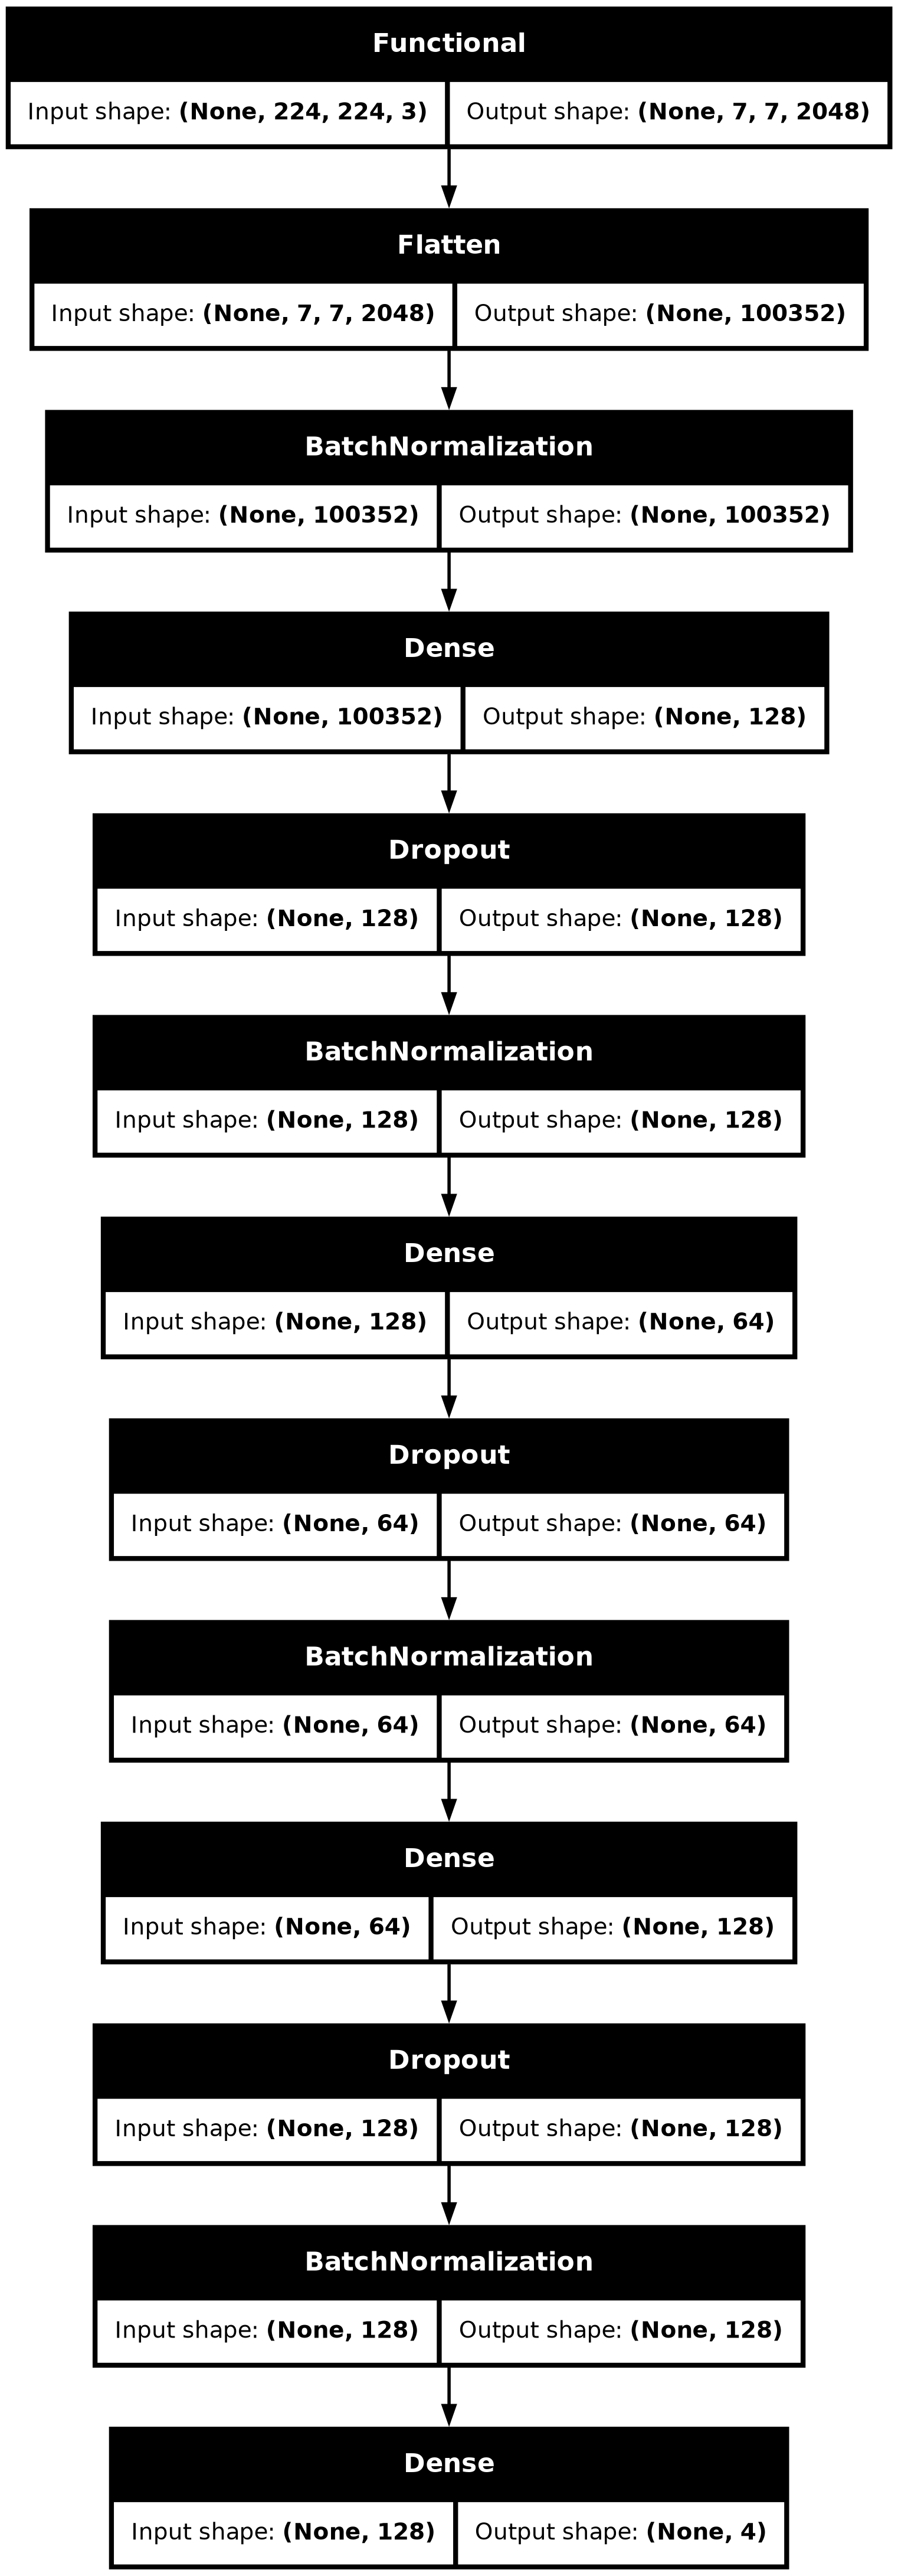

In [75]:
keras.utils.plot_model(res_model, show_shapes=True)

### Visualization ResNet50

####  Accuracy 

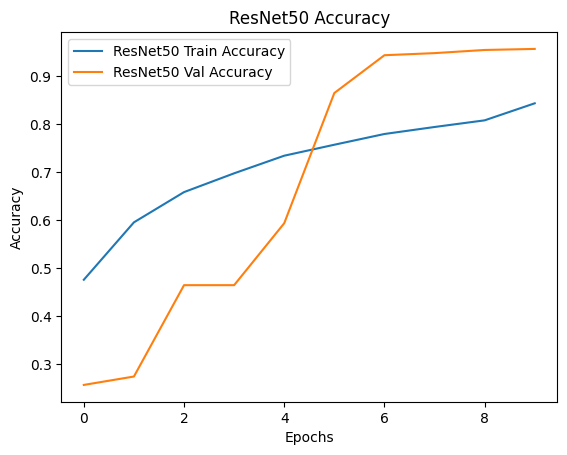

In [76]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for ResNet50
def plot_resnet_accuracy(resnet_history):
    plt.plot(resnet_history.history['acc'], label='ResNet50 Train Accuracy')
    plt.plot(resnet_history.history['val_acc'], label='ResNet50 Val Accuracy')
    plt.title('ResNet50 Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_resnet_accuracy(history)  # Assuming 'history' is the ResNet50 model history


#### Loss

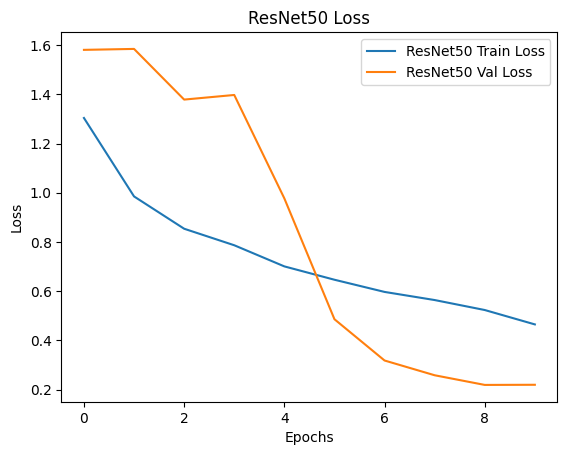

In [77]:
# Plot training and validation loss for ResNet50
def plot_resnet_loss(resnet_history):
    plt.plot(resnet_history.history['loss'], label='ResNet50 Train Loss')
    plt.plot(resnet_history.history['val_loss'], label='ResNet50 Val Loss')
    plt.title('ResNet50 Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_resnet_loss(history)  # Assuming 'history' is the ResNet50 model history


------

## VGG16 Model 💫


In [79]:
vgg_base = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [80]:
vgg_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
for layer in vgg_base.layers:
    layer.trainable = False

In [86]:
# Build the model
vgg_model = models.Sequential()
vgg_model.add(vgg_base)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.BatchNormalization())
vgg_model.add(layers.Dense(128, activation='relu'))
vgg_model.add(layers.Dropout(0.5))
vgg_model.add(layers.BatchNormalization())
vgg_model.add(layers.Dense(64, activation='relu'))
vgg_model.add(layers.Dropout(0.5))
vgg_model.add(layers.Dense(num_of_class, activation='softmax'))

In [87]:
# Compile the model with a higher learning rate
vgg_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),  
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [88]:
vgg_his = vgg_model.fit(
    x_train_scaled,  
    y_train,
    validation_split=0.1,
    epochs=10
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - acc: 0.4759 - loss: 1.1789 - val_acc: 0.2757 - val_loss: 5.8193
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - acc: 0.6406 - loss: 0.8613 - val_acc: 0.2757 - val_loss: 7.2416
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - acc: 0.6985 - loss: 0.7455 - val_acc: 0.2757 - val_loss: 4.9723
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - acc: 0.7059 - loss: 0.7158 - val_acc: 0.2757 - val_loss: 2.9970
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - acc: 0.7383 - loss: 0.6600 - val_acc: 0.4442 - val_loss: 1.2301
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - acc: 0.7567 - loss: 0.6185 - val_acc: 0.6761 - val_loss: 0.7648
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - acc: 0.7764 - loss: 0.5749 - val_acc: 0.8403 - val_loss: 0.4932
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - acc: 0.7665 - loss: 0.5901 - val_acc: 0.8337 - val_loss: 0.4832
Epoch 9/10
129/129 ━━━━━━━━━━━━━

### Model Evaluation 

In [113]:
loss, accuracy = vgg_model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 464ms/step - acc: 0.8529 - loss: 0.3988
Test Accuracy = 0.847769021987915


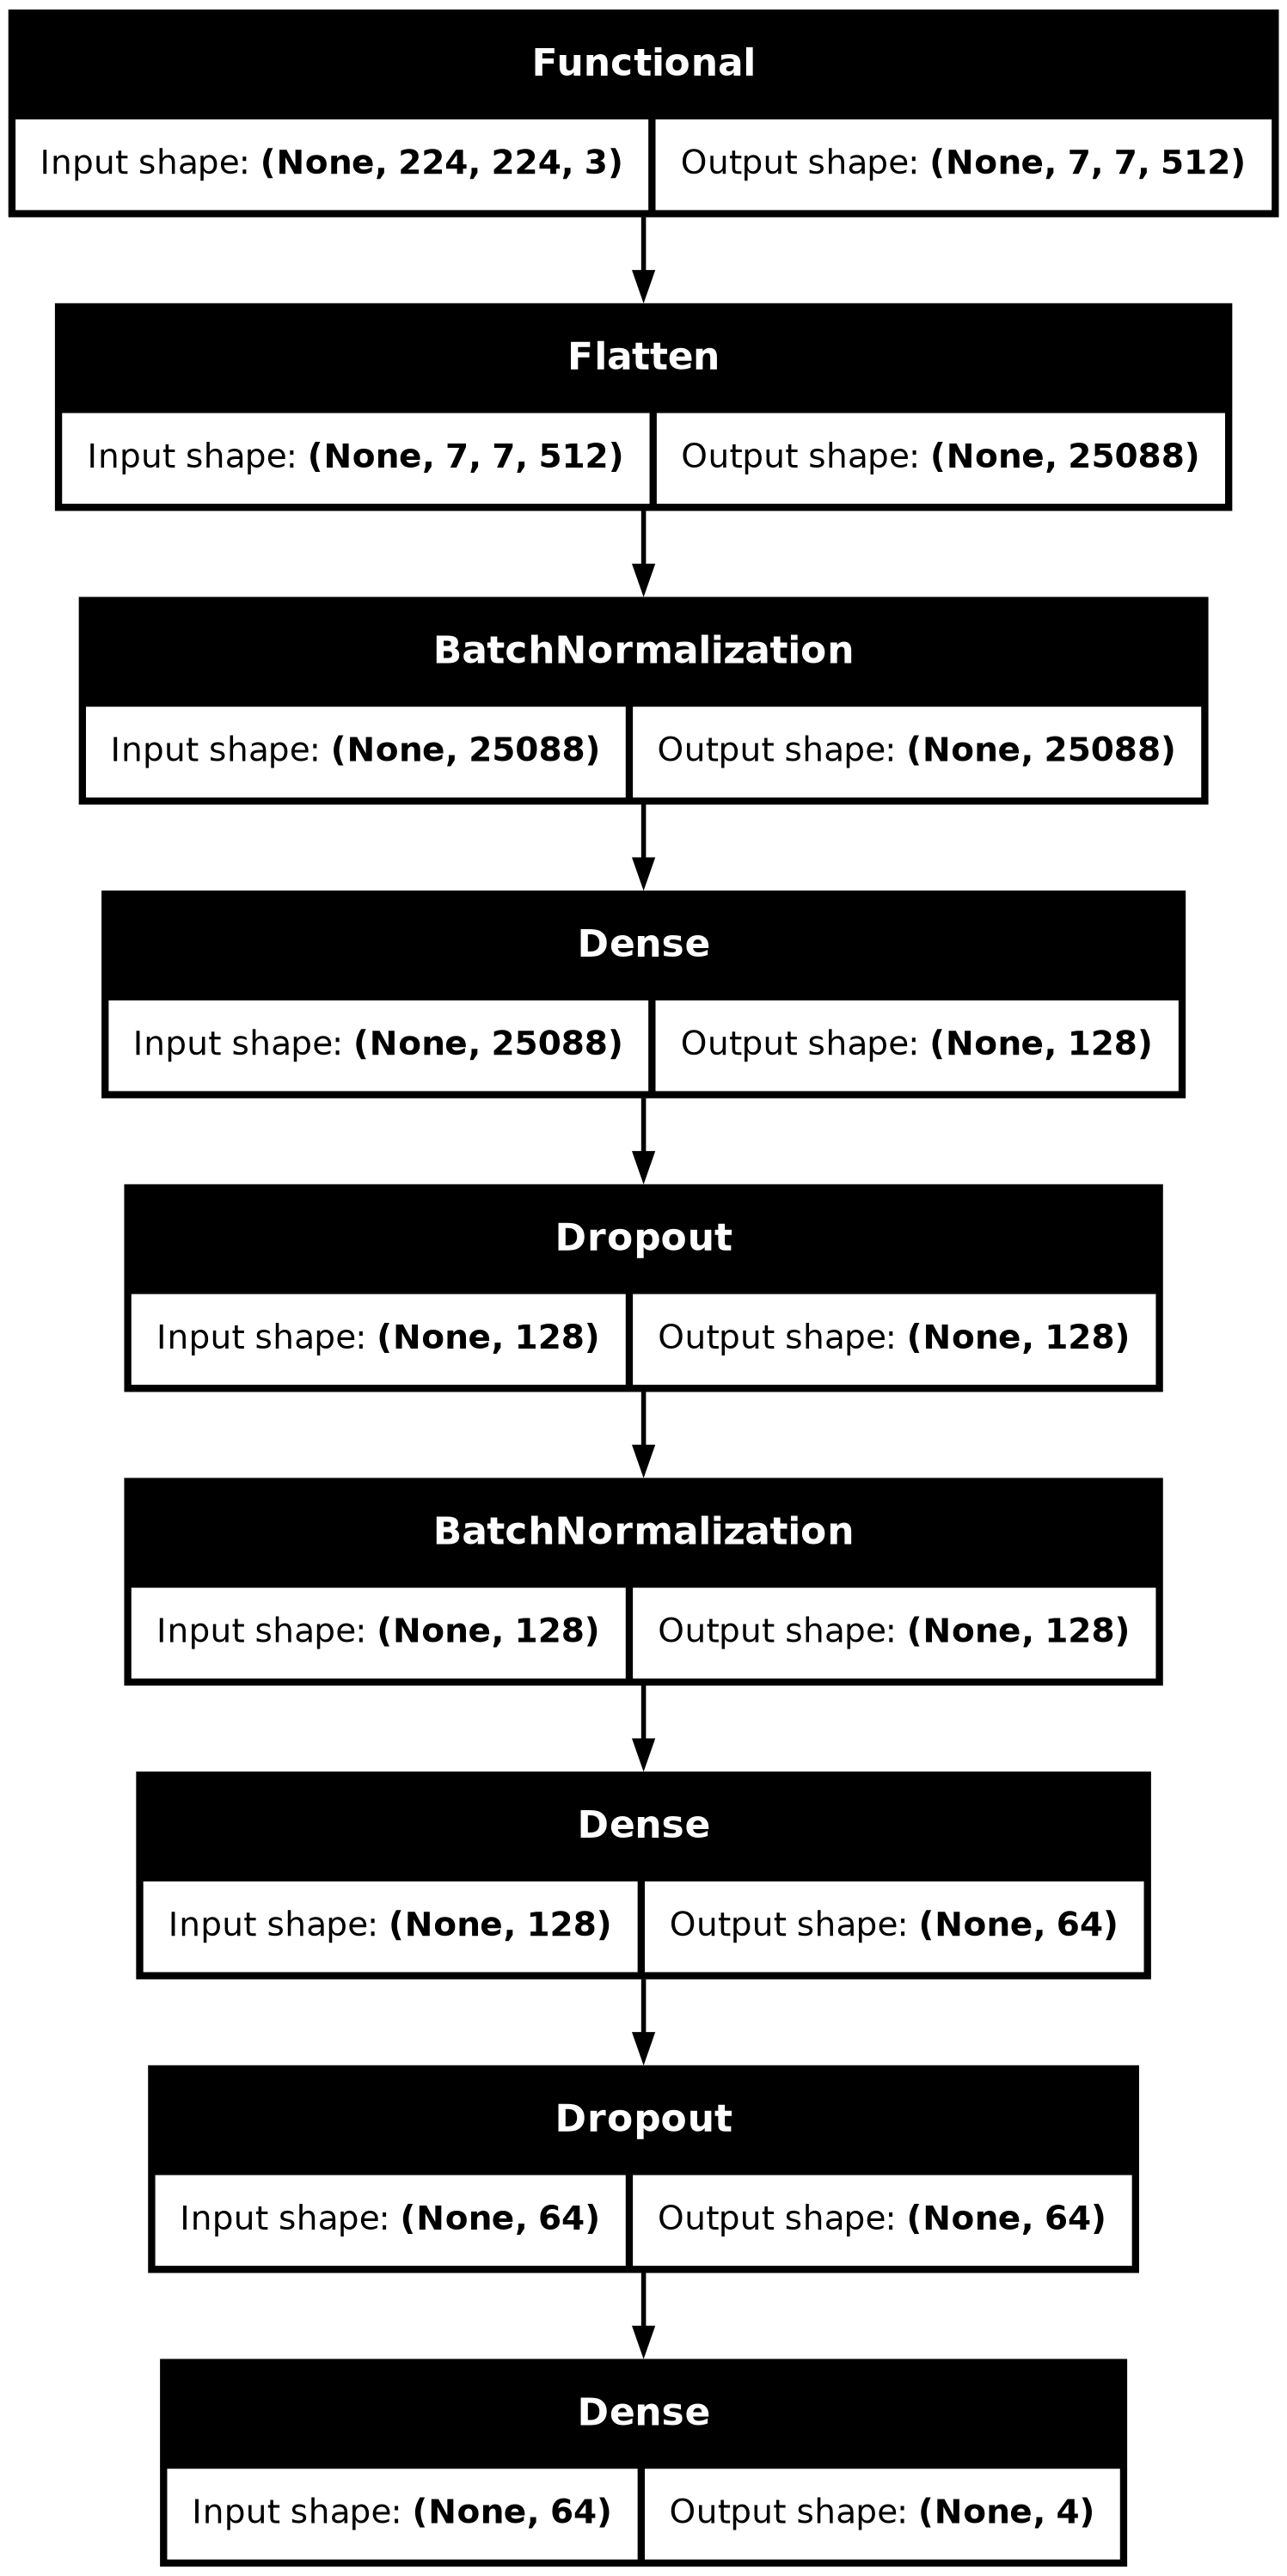

In [89]:
keras.utils.plot_model(vgg_model, show_shapes=True)

### Visulaization VGG16

#### Accuracy 

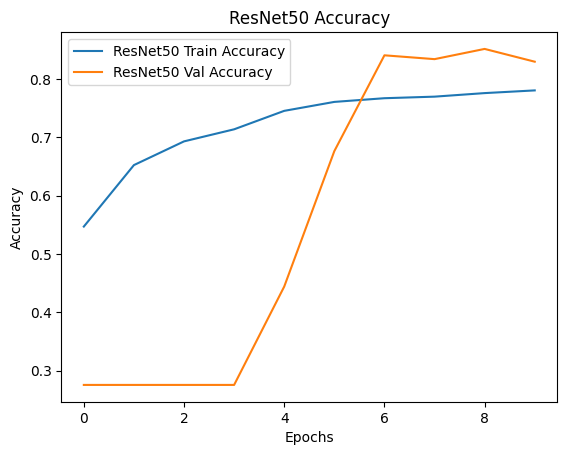

In [90]:
def plot_vgg_accuracy(vgg_his):
    plt.plot(vgg_his.history['acc'], label='VGG16 Train Accuracy')
    plt.plot(vgg_his.history['val_acc'], label='VGG16 Val Accuracy')
    plt.title('VGG16Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_vgg_accuracy(vgg_his)  


#### Loss

In [ ]:
def plot_vgg_loss(vgg_his):
    plt.plot(vgg_his.history['loss'], label='VGG16 Train Loss')
    plt.plot(vgg_his.history['val_loss'], label='VGG16 Val Loss')
    plt.title('VGG16 Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_vgg_loss(vgg_his)  


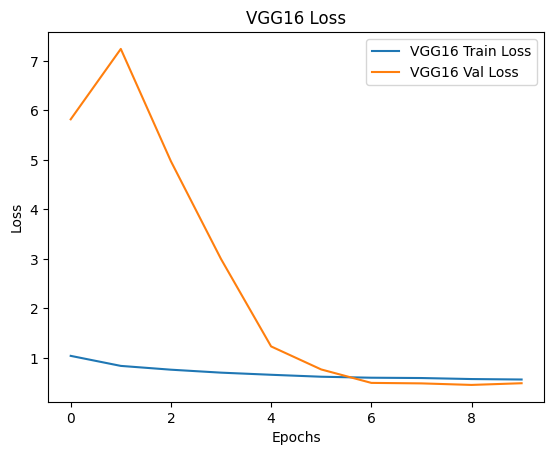

In [91]:
def plot_vgg_loss(vgg_his):
    plt.plot(vgg_his.history['loss'], label='VGG16 Train Loss')
    plt.plot(vgg_his.history['val_loss'], label='VGG16 Val Loss')
    plt.title('VGG16 Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_vgg_loss(vgg_his)  


---

## EfficienetB6 Model 💫

In [93]:
effB6_base = EfficientNetB6(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [94]:
effB6_base.summary()

Model: "efficientnetb6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_11[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,512 │ stem_conv_pad[0]… │
│                     │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        224 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        504 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        224 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 56)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 56)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 14)  │        798 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 56)  │        840 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 56)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,792 │ block1a_se_excit

 Total params: 40,960,143 (156.25 MB)

 Trainable params: 40,735,704 (155.39 MB)

 Non-trainable params: 224,439 (876.72 KB)

In [116]:
for layer in effB6_base.layers:
    layer.trainable = False

In [117]:
effB6_model = models.Sequential()
effB6_model.add(effB6_base)
effB6_model.add(Flatten())
effB6_model.add(BatchNormalization())
effB6_model.add(Dense(128,activation='relu'))
effB6_model.add(Dropout(0.5))
effB6_model.add(BatchNormalization())
effB6_model.add(Dense(64,activation='relu'))
effB6_model.add(Dropout(0.5))
effB6_model.add(BatchNormalization())
effB6_model.add(Dense(num_of_class,activation='softmax'))

In [118]:
effB6_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [119]:
eff_his = effB6_model.fit(
    x_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=10
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 218s 882ms/step - acc: 0.6793 - loss: 0.8325 - val_acc: 0.8600 - val_loss: 0.3814
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - acc: 0.8198 - loss: 0.5085 - val_acc: 0.8731 - val_loss: 0.3341
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - acc: 0.8666 - loss: 0.3938 - val_acc: 0.8906 - val_loss: 0.3020
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - acc: 0.8744 - loss: 0.3752 - val_acc: 0.8972 - val_loss: 0.2909
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - acc: 0.8966 - loss: 0.3128 - val_acc: 0.9015 - val_loss: 0.2725
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - acc: 0.9090 - loss: 0.2931 - val_acc: 0.9103 - val_loss: 0.2592
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - acc: 0.9087 - loss: 0.2852 - val_acc: 0.8950 - val_loss: 0.2557
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - acc: 0.9209 - loss: 0.2470 - val_acc: 0.9059 - val_loss: 0.2474
Epoch 9/10
129/129 ━━━━━━━━━━━━

### Model Evaluation 

In [120]:
loss, accuracy = effB6_model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - acc: 0.9386 - loss: 0.1783
Test Accuracy = 0.93438321352005


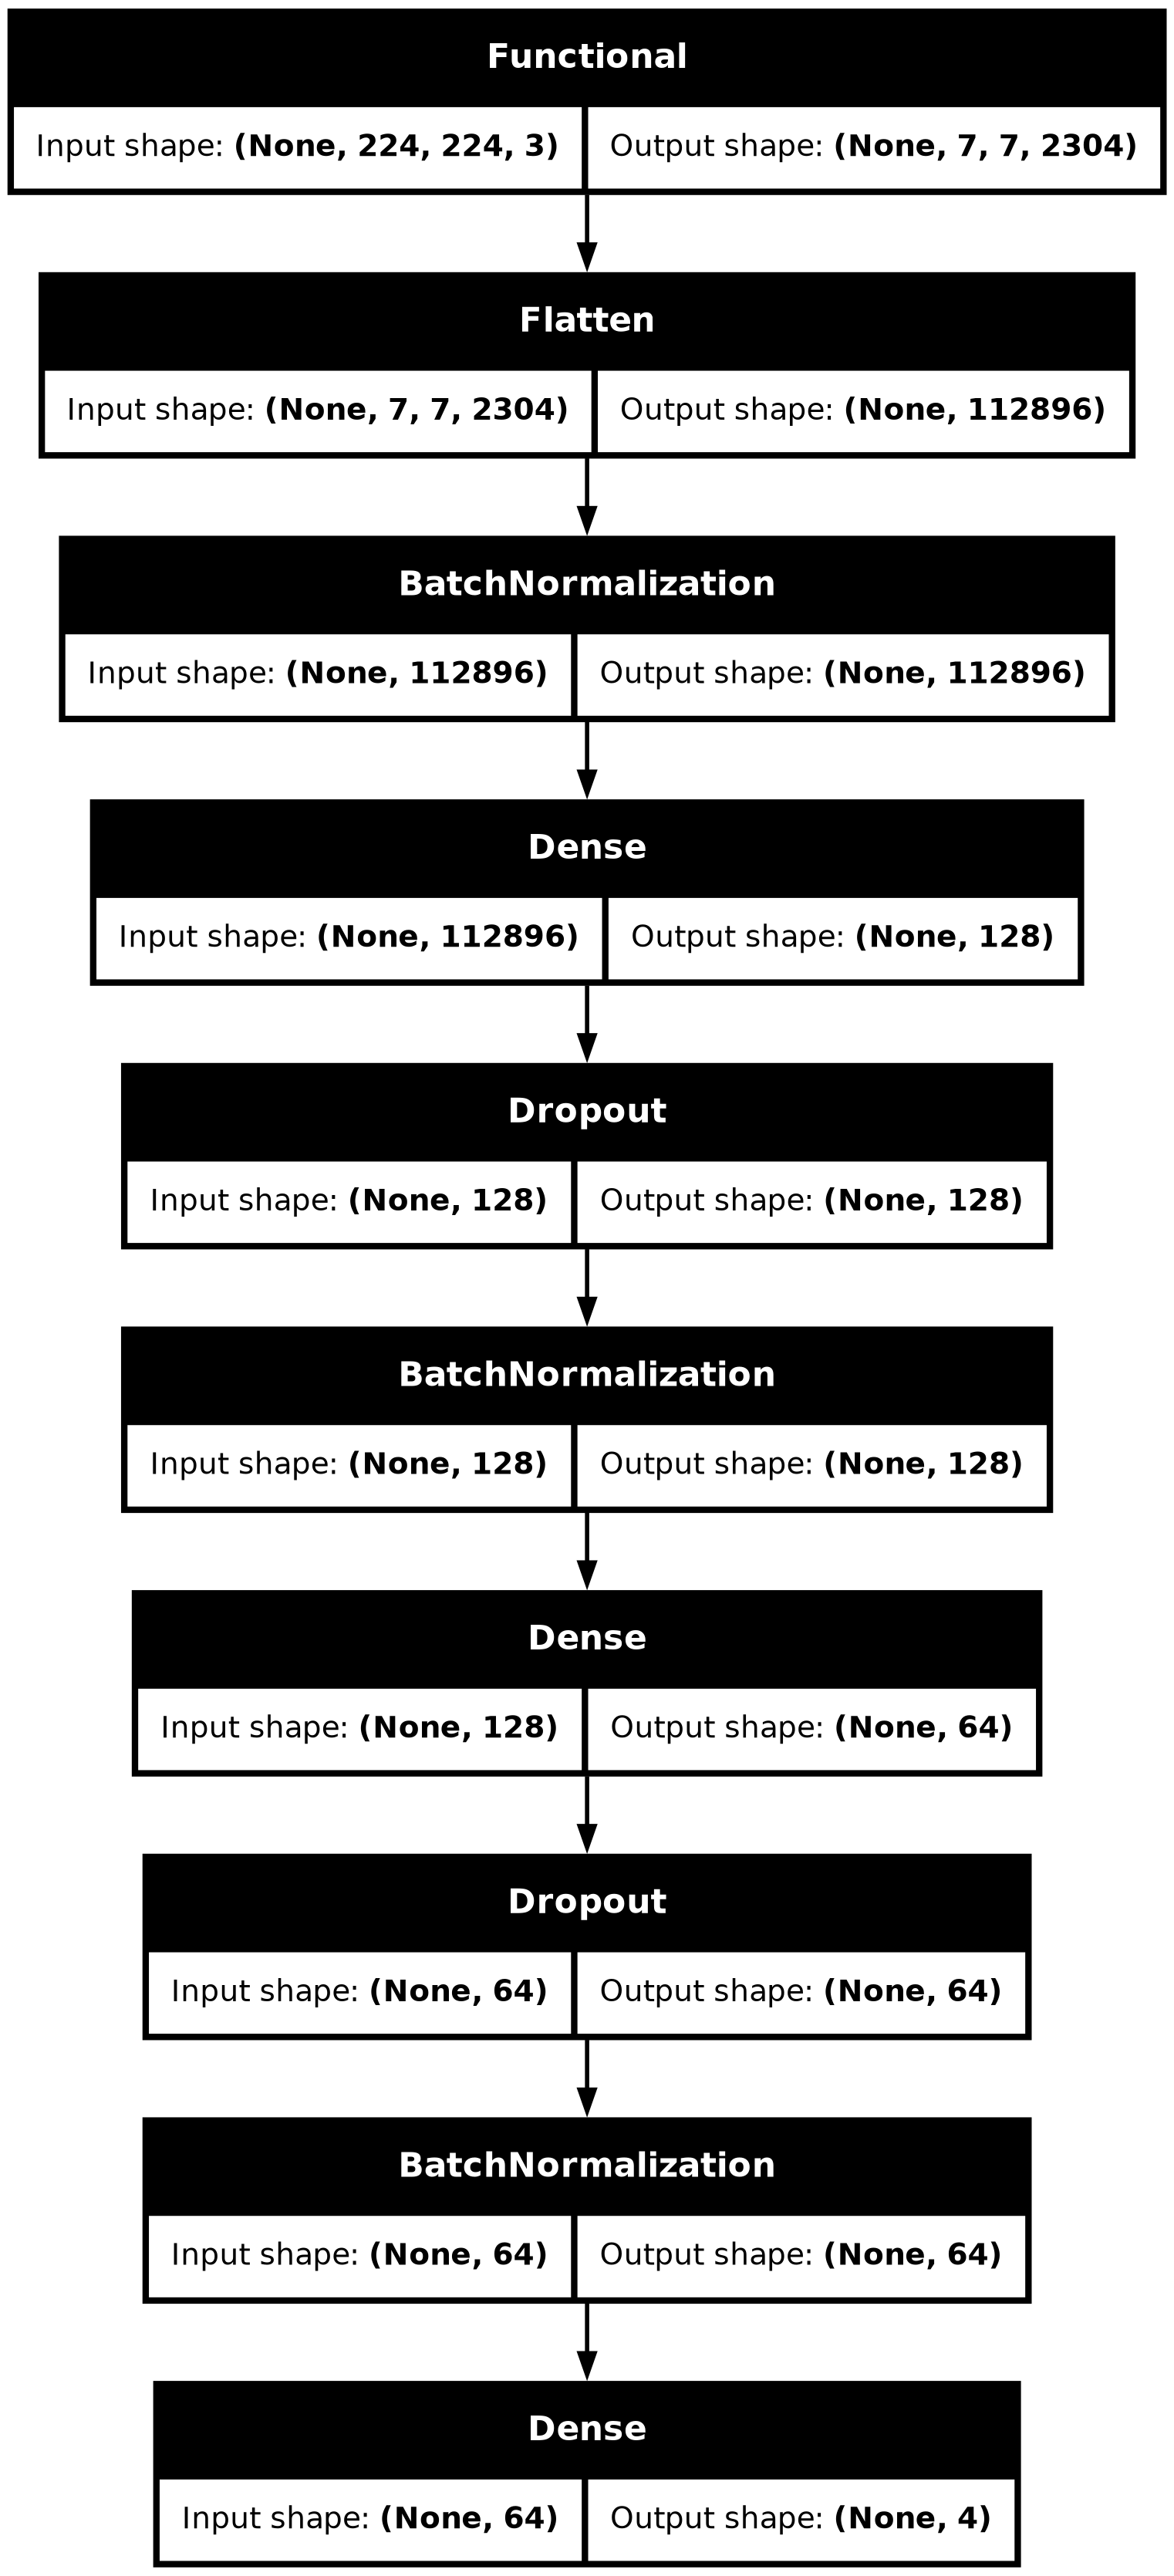

In [99]:
keras.utils.plot_model(effB6_model, show_shapes=True)

### Visualization EfficientNetB6

#### Accuracy 

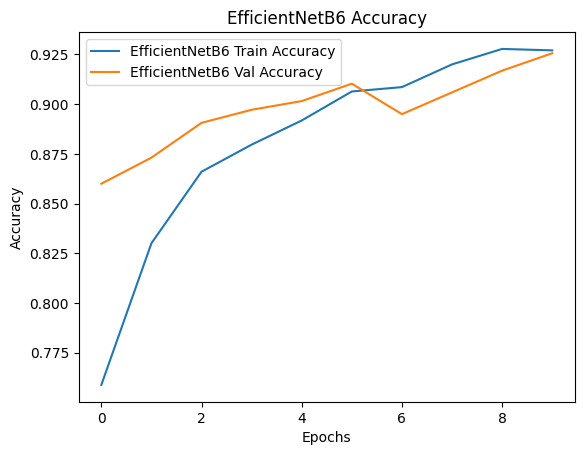

In [121]:
def plot_eff_accuracy(eff_his):
    plt.plot(eff_his.history['acc'], label='EfficientNetB6 Train Accuracy')
    plt.plot(eff_his.history['val_acc'], label='EfficientNetB6 Val Accuracy')
    plt.title('EfficientNetB6 Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_eff_accuracy(eff_his)  


#### Loss

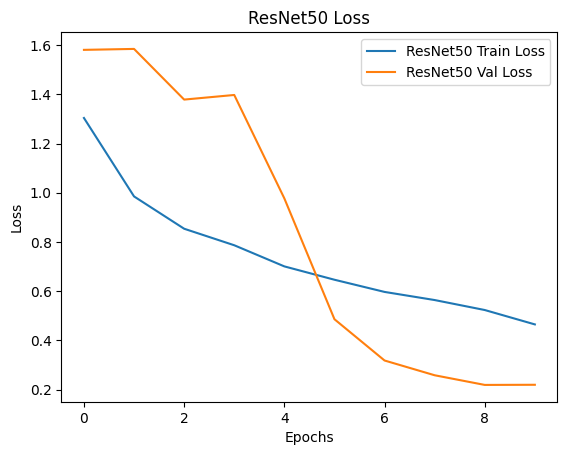

In [122]:
def plot_eff_loss(eff_his):
    plt.plot(eff_his.history['loss'], label='EfficientNetB6 Train Loss')
    plt.plot(resnet_history.history['val_loss'], label='EfficientNetB6 Val Loss')
    plt.title('EfficientNetB6 Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_resnet_loss(history)  


---

# Compare between 3 Pre trained models 💪 

## Visualization 

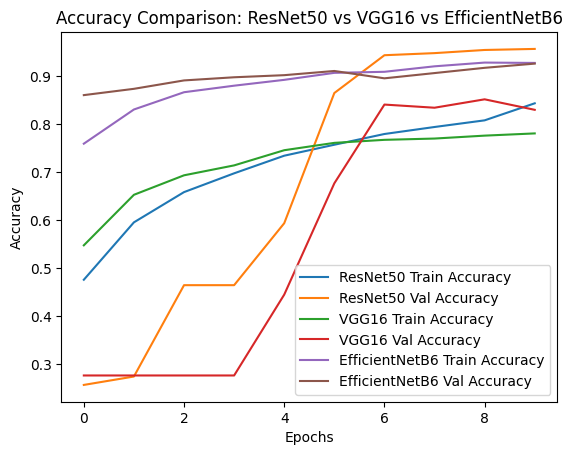

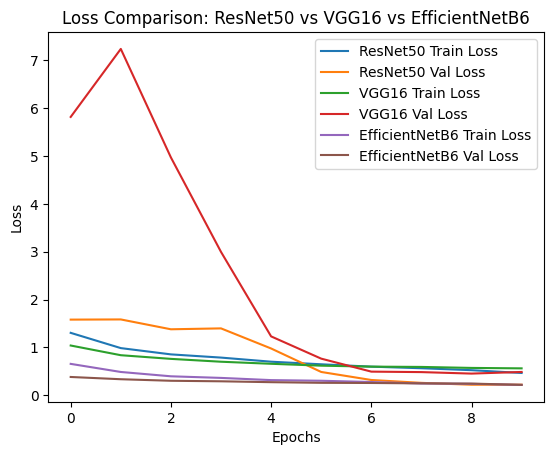

In [123]:
# Plot training and validation accuracy for ResNet50, VGG16, and EfficientNetB6
def plot_accuracy(history, vgg_his, eff_his):
    plt.plot(history.history['acc'], label='ResNet50 Train Accuracy')
    plt.plot(history.history['val_acc'], label='ResNet50 Val Accuracy')
    plt.plot(vgg_his.history['acc'], label='VGG16 Train Accuracy')
    plt.plot(vgg_his.history['val_acc'], label='VGG16 Val Accuracy')
    plt.plot(eff_his.history['acc'], label='EfficientNetB6 Train Accuracy')
    plt.plot(eff_his.history['val_acc'], label='EfficientNetB6 Val Accuracy')
    plt.title('Accuracy Comparison: ResNet50 vs VGG16 vs EfficientNetB6')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history, vgg_his, eff_his)

# Similarly, plot the loss
def plot_loss(history, vgg_his, eff_his):
    plt.plot(history.history['loss'], label='ResNet50 Train Loss')
    plt.plot(history.history['val_loss'], label='ResNet50 Val Loss')
    plt.plot(vgg_his.history['loss'], label='VGG16 Train Loss')
    plt.plot(vgg_his.history['val_loss'], label='VGG16 Val Loss')
    plt.plot(eff_his.history['loss'], label='EfficientNetB6 Train Loss')
    plt.plot(eff_his.history['val_loss'], label='EfficientNetB6 Val Loss')
    plt.title('Loss Comparison: ResNet50 vs VGG16 vs EfficientNetB6')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history, vgg_his, eff_his)
